## Optimization Problem

1.optimization problem

2.dynamic programming (coding)

3.gradient descent (coding)

4.machine learning

5.feature、model、predicate

6.vector destance (coding)

7.k-means 聚类 (coding)

参考资料和书籍：http://github.com/computing-intelligence/references

python学习视频：https://www.coursera.org/specializations/python

python高级编程：https://www.udacity.com/course/design-of-computer-programs--cs212

Computing Principles:https://www.coursera.org/learn/build-a-computer? AND https://www.coursera.org/learn/nand2tetris2

Algorithm Design and Analysis: https://www.edx.org/course/algorithms-design-and-analysis


## Lecture-02 Dynamic Programming to Machine learning

## 动态规划


In [173]:
origianl_price = [1,5,8,9,10,17,17,20,24,30,33]#长度为1到11的价钱
len(origianl_price)

11

In [118]:
price = {i + 1:p for i, p in enumerate(origianl_price)} # list comprehension

In [119]:
price[8]

20

In [120]:
from collections import defaultdict

In [121]:
price = defaultdict(int)

In [122]:
for i,p in enumerate(origianl_price): 
    price[i + 1] = p

In [123]:
some_numbers = [(1,2), (2,1), (-1,0)]

In [124]:
sorted(some_numbers, key=lambda x: x[0])

[(-1, 0), (1, 2), (2, 1)]

In [125]:
## decorator

In [126]:
from datetime import datetime

In [127]:
datetime.now()

datetime.datetime(2023, 4, 26, 19, 48, 45, 411105)

In [128]:
import time 

In [129]:
@get_func_time
def func_1(n):
    #begin = datetime.now()
    time.sleep(0.1)  # 假设这代表该方法中的一段执行程序，想获取它运行的时间，则如下计算
    #print('used time = {}'.format(datetime.now() - begin))
    return n

In [131]:
func_1(9)

used time = 0:00:00.104035


9

In [132]:
def func_2(n):
    #begin = datetime.now()
    
    sum_ = 0
    for i in range(n ** n):
        sum_ += 1
    
    #print('used time = {}'.format(datetime.now() - begin))
    
    return n

## Python 是一个可以面向函数编程的语言

可以作为变量，可以作为返回值

In [133]:
def get_func_time(func):
    def _wrap(n):
        begin = datetime.now()
        result = func(n)
        print('used time = {}'.format(datetime.now() - begin))
        
        return result
    return _wrap

In [134]:
func_1

<function __main__.get_func_time.<locals>._wrap(n)>

In [135]:
func_1(9)

used time = 0:00:00.105054


9

In [136]:
another = func_1

In [137]:
another(9)

used time = 0:00:00.103650


9

In [138]:
func_1_with_time = get_func_time(func_1)

# 装饰器

"""
@another_func
def some_func():
    pass
    
=>some_func = another_func(some_func)
"""

'\n@another_func\ndef some_func():\n    pass\n    \n=>some_func = another_func(some_func)\n'

In [139]:
def memo(func):
    cache = {}
    
    #def _wrap(*args, **kwargs):
    def _wrap(n):
        if n in cache:
            result = cache[n]
        
        else:
            result = func(n)
            cache[n] = result
        return result
    return _wrap

In [140]:
memo(9)

<function __main__.memo.<locals>._wrap(n)>

In [141]:
func_2_with_time = get_func_time(func_2)

In [142]:
func_1_with_time

<function __main__.get_func_time.<locals>._wrap(n)>

In [143]:
func_1_with_time(9)

used time = 0:00:00.100668
used time = 0:00:00.100973


9

In [144]:
func_2_with_time(8)

used time = 0:00:00.712211


8

In [145]:
solution = {}

@memo #机器
def r(n): # the revenue of length n
    #candidates = []
    
    #for i in range(1,n):
    #    candidates.append((r(i) + r(n - i),i)) # i 的地方切割的价钱
    
    #candidates.append((price[n], 0)) # 0地方切割的价钱，比如n=3，price[n]=8,(8,0)表示一个向量
    
    #max_price, split_point = max(candidates, key=lambda x: x[0])
    
    #max([price[n], 0] + [(r(i) + r(n-i), i) for i in target])
    max_price, split_point = max([(price[n], 0)] + [(r(i) + r(n - i), i) for i in 
                                    range(1, n)], key = lambda x:x[0])
    
    global solution
    solution[n] = (split_point, n - split_point)
    
    return max_price

In [146]:
%%time  
r(15)  # python in jupyter 's function

CPU times: user 203 µs, sys: 20 µs, total: 223 µs
Wall time: 230 µs


43

In [170]:
def not_cut(n): return n == 0

In [167]:
def parse_solution(target_length, revenue_solution):
    left, right = revenue_solution[target_length]
    
    if not_cut(left): return [right]
    
    return parse_solution(left, revenue_solution) + parse_solution(right, revenue_solution)
        

## Dynamic Programming

In [168]:
r(37)

110

In [162]:
solution[15]

(2, 13)

In [172]:
parse_solution(37, solution)

[6, 10, 10, 11]

## 重复子模块问题

把变量的值存入表中，需要的时候直接去表里查找，即 查表法 (dynamic programming)

## 装饰器 decorator

## 总结动态规划

## 解决具备一定的限制条件的最优问题

### 1.这个问题可以被分割成若干个字问题
### 2.子问题之间存在着overlapping 重合 
### 3.对重合的子问题进行cache（缓存）
### 4.依据cache 数据加速解决问题
### 5.还要构建parse solution 函数解析最终的结果

1.Edit Distance 编辑距离

2.基因测序里边的相似基因判断

3.图形学里边的覆盖问题

4.路径规划问题


## Dynamic Programming

#### 识别子问题 sub-problems dividing
#### 识别子问题中的重叠特点 over-lapping sub-problem
#### 存储子问题的答案 cache sub-solutions
#### 合并问题答案 combine solutions
#### 解析答案 parse solutions

## IF Dynamic Programming is Very Difficult
#### 1.限制条件极其多（上万个）
#### 2.问题分解极其复杂（难以识别子问题）
#### 3.子问题拆解极其复杂（时间复杂度太高）
#### 怎么办？？？

## 这时我们提出了机器学习！！！

银行运钞车城市内各个网点取钱最短路径问题
TSP 旅行商问题

## Machine Learning

采用向量来标记事物，物理形态转为数字态

回归（Regression）：函数运行包含有一系列数值的向量比如如下的 $\vec{man} 输出为某个确定的值，这种现象即为回归。
《物理学的进化》（爱因斯坦）

$\vec{man}=(1.73,18000,1, 0010, 28)$

$\vec{man} ----------> 0.75&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Regression（回归）

           ----->1/-1                 Binary Classsification（二分类）
           
           ----->(0.2,0.7,0.1)        Multiclass Classification（多分类）
           
           ----->action1,...,actionN  Sequence Learning（序列学习）
           
           ----->1 2 3 4 / 3 2 4 1    Rank（排序）

## Machine Learning is 人工+自动/半自动 ==> 函数f(x)

## example 监督学习

$\vec{email}=(213,1,27,0,1)$

Regression:比如说根据email向量做回归问题，判断这封邮件是真假的可能性，和我的相关程度

Binary Classification:邮件是否是垃圾邮件

Multiclass Classification:比如是假邮件，垃圾邮件，家庭邮件，工作邮件

Sequence Learning:收到一封邮件，输出一段话

Rank:将收到的邮件按照大小排序

## 非监督学习 （也称作聚类）

#### 对于所有的机器学习都可以归为如下流程

Observed Data --> Feature extractor --> vector --> learning --> f(x)

利用 new data 进行特征提取x,代入f(x),得出y

区别：提供(x,y),f(x) 和 预测的 y 进行比较，这就是监督学习

不提供预测的 y，就是非监督学习

损失函数loss：loss = ｜f(x) - y｜

也就是实际值和预测值之间的差值

梯度下降(Gradient Descent)：把监督式学习过程转变为输入x，loss函数最小，即实际f(x)与预测y无限接近，类似于二元一次函数中导数为0的点

实际情况中机器学习也确实是常见的loss 函数都是凸函数（一些常见的凸函数包括线性函数、指数函数、对数函数、幂函数等）

## Gradient Descent

In [2]:
import numpy as np

In [3]:
def func(x):
    return 10*x**2 + 37*x + 9

In [4]:
def gradient(x):
    return 20*x + 37

In [5]:
import matplotlib.pyplot as plt

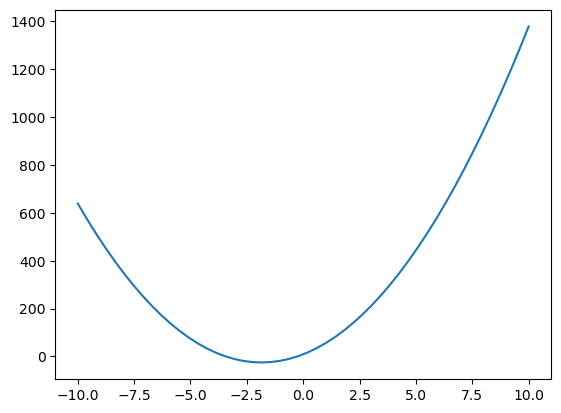

In [6]:
x = np.linspace(-10, 10)
plt.plot(x, func(x))

In [7]:
import random

In [8]:
steps = []

x_optimal = random.choice(x)

In [9]:
x_optimal

-6.326530612244898

$$x = x + (-1)*\frac{\partial{y}}{\partial{x}}\alpha$$

In [10]:
alpha = 1e-4

for i in range(50):
    x_optimal = x_optimal + (-1)*gradient(x_optimal)*alpha
    steps.append(x_optimal)

In [11]:
for s in steps:
    print(s, func(s))

-6.317577551020409 174.36749174381518
-6.308642395918368 173.56992014680688
-6.2997251111265316 172.77553564590025
-6.290825660904279 171.98432550545922
-6.28194400958247 171.19627704073943
-6.273080121563305 170.41137761768465
-6.264233961320179 169.62961465272437
-6.2554054933975385 168.8509756125721
-6.246594682410743 168.0754480140242
-6.237801493045922 167.3030194237602
-6.229025890059829 166.5336774581428
-6.220267838279709 165.7674097830201
-6.21152730260315 165.0042041135271
-6.2028042479979435 164.24404821388947
-6.194098639501948 163.48692989722673
-6.185410442222944 162.73283702535738
-6.1767396213384975 161.98175750860406
-6.16808614209582 161.2336793055996
-6.159449969811629 160.48859042309445
-6.150831069872005 159.74647891576382
-6.142229407732261 159.00733288601634
-6.133644948916796 158.27114048380383
-6.125077659018962 157.53788990643054
-6.116527503700924 156.80756939836442
-6.107994448693522 156.0801672510485
-6.099478459796135 155.3556718027133
-6.090979502876543 1

## 淘宝国际查抄违禁违法物品进行下架

#### 将文本向量化

选取部分淘宝商品描述

将文本向量化 (最简单的方式是 tf-idf) (原理：单词越稀有，频率越高）

将文本进行聚类

按照已知“暗语”定位商品类别

获得该商品类别中词汇频率远高于正常词汇分布的单词

## TF-IDF
（Term Frequency-Inverse Document Frequency，词频-逆文档频率）

一种常用于信息检索与文本挖掘的技术，用于评估一个词语对于一个文档集合中某个文档的重要程度。它的计算公式如下：

tf - idf(t, d) = tf(t, d) * idf(t)

词语t (team)在文档 d(doucument)中出现的次数，idf(t) 表示逆文档频率

idf(t) = log(N/df(t))

其中N 表示文档集合中文档的总数，df(t)表示包含词语t 的文档数。逆文档频率表示词语 t。

对于整个文档集合的重要程度，如果一个词语在很多文档中都出现，那么它的逆文档频率就会很低，反之则会很高。

TF-IDF 的计算结果是一个数值，用于评估一个词语对于一个文档的重要程度。

通常，我们可以将每个文档表示成一个向量，其中每个维度对应一个词语的 TF-IDF 值。

这样，我们就可以使用向量空间模型（Vector Space Model）来评估文档之间的相似度，从而实现信息检索与文本分类等任务。


## 非常重要的两个经验


算法工程师最重要的不是记住了多少算法，而是能把实际问题抽象成算法问题，然后得到答案的能力

机器学习方法很多时候是作为整个项目的一部分，单靠机器学习很难解决完整项目